In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

df = pd.read_csv('E:\dangueData.csv')

In [0]:
df.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DANGUE,LEVEL
0,2008,1,12.993929,25.059539,78.824885,1.286636,0,1
1,2008,2,13.658286,26.383448,72.602956,0.687685,0,1
2,2008,3,20.411250,31.367558,76.903226,0.974194,0,1
3,2008,4,22.771889,34.031619,73.943810,0.980952,0,1
4,2008,5,23.945625,34.171060,77.360369,7.021198,0,1


In [0]:
x = df[['MONTH','YEAR','HUMIDITY', 'MIN', 'RAINFALL', 'MAX']]
y = df['LEVEL']

In [0]:
df.corr()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DANGUE,LEVEL
YEAR,1.000000,-0.039341,-0.026401,-0.042889,0.008876,0.335181,0.372338,0.465797
MONTH,-0.039341,1.000000,0.273338,0.084662,0.530021,0.021895,0.316265,0.443394
MIN,-0.026401,0.273338,1.000000,0.879903,0.502352,0.231499,0.301316,0.414593
MAX,-0.042889,0.084662,0.879903,1.000000,0.087856,0.064593,0.177811,0.221934
HUMIDITY,0.008876,0.530021,0.502352,0.087856,1.000000,0.094968,0.275363,0.482472
RAINFALL,0.335181,0.021895,0.231499,0.064593,0.094968,1.000000,0.368675,0.322285
DANGUE,0.372338,0.316265,0.301316,0.177811,0.275363,0.368675,1.000000,0.862293
LEVEL,0.465797,0.443394,0.414593,0.221934,0.482472,0.322285,0.862293,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
YEAR        134 non-null int64
MONTH       134 non-null int64
MIN         134 non-null float64
MAX         134 non-null float64
HUMIDITY    134 non-null float64
RAINFALL    134 non-null float64
DANGUE      134 non-null int64
LEVEL       134 non-null int64
dtypes: float64(4), int64(4)
memory usage: 8.5 KB


In [0]:
#logistic regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#logistic regression performance 
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


print("Precision:",metrics.precision_score(y_test, predictions,average='micro'))
print("Recall:",metrics.recall_score(y_test,predictions,average='micro' ))

Coefficients: [[ 3.70054200e-02  6.27485999e-03 -1.97104935e-01  4.56529357e-03
  -9.18715864e-02  6.89120425e-02]
 [-2.43607809e-01 -3.05523618e-03  1.12360365e-01 -1.73913139e-01
  -8.47290408e-04  6.09618824e-02]
 [ 2.16928396e-01 -3.32894483e-03  7.40671690e-02  2.37733972e-01
  -6.11414364e-04 -2.47988534e-01]
 [ 9.60238854e-01 -2.60374904e-02  4.33928855e-01  4.65008931e-01
  -1.37366915e-02 -1.69155313e-01]
 [ 5.09313616e-01 -1.46427375e-02  1.10097875e-01  6.89089145e-02
   4.36300719e-03  3.74118144e-01]
 [ 1.25257444e+00 -3.44553555e-03 -4.57885063e-01  9.04977132e-01
   5.53531284e-03  2.75129043e-01]]
Intercept: [ 1.22208627e-03 -2.96896671e-03  6.10788908e-05 -2.90762967e-03
 -5.94417224e-03 -3.38067193e-03]
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.25      0.29        12
           2       0.40      0.60      0.48        10
           3       1.00      0.50      0.67         4
           4       0.00     

In [0]:
#Classification Tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
import graphviz

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

In [0]:
#Classification Tree performance
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = clf.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.91      1.00      0.95        10
           3       0.67      1.00      0.80         4
           4       0.00      0.00      0.00         1

   micro avg       0.89      0.89      0.89        27
   macro avg       0.64      0.71      0.67        27
weighted avg       0.88      0.89      0.88        27


Accuracy: 0.8889
Confusion Matrix:
 [[10  1  1  0]
 [ 0 10  0  0]
 [ 0  0  4  0]
 [ 0  0  1  0]]


C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=3)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [0]:
#Random forest performance
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.71      1.00      0.83        10
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         1

   micro avg       0.85      0.85      0.85        27
   macro avg       0.68      0.65      0.65        27
weighted avg       0.86      0.85      0.84        27


Accuracy: 0.8519
Confusion Matrix:
 [[10  2  0  0]
 [ 0 10  0  0]
 [ 0  1  3  0]
 [ 0  1  0  0]]


C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Support Vector Machine 
from sklearn.svm import SVC
svmmdl=SVC()
svmmdl.fit(x_train, y_train)

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
#Support Vector Machine 
y_pred=svmmdl.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.33      0.47        12
           2       0.38      0.80      0.52        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

   micro avg       0.44      0.44      0.44        27
   macro avg       0.30      0.28      0.25        27
weighted avg       0.50      0.44      0.40        27


Accuracy: 0.4444
[[4 8 0 0]
 [1 8 1 0]
 [0 4 0 0]
 [0 1 0 0]]


C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
x = df[['MONTH','YEAR','HUMIDITY', 'MIN', 'RAINFALL', 'MAX']]
y = df['LEVEL']
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = linreg.predict(x_test)
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred ))
print('MSE:', metrics.mean_squared_error(y_test, y_pred ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred )))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [ 0.13426258  0.21285031  0.04909226  0.08768993  0.00122989 -0.00367424]
Intercept: -432.6681384586335
MAE: 0.5939561242717075
MSE: 0.4881846274429147
RMSE: 0.6987021020742064
AccuracyII: 29.387580673435544 %


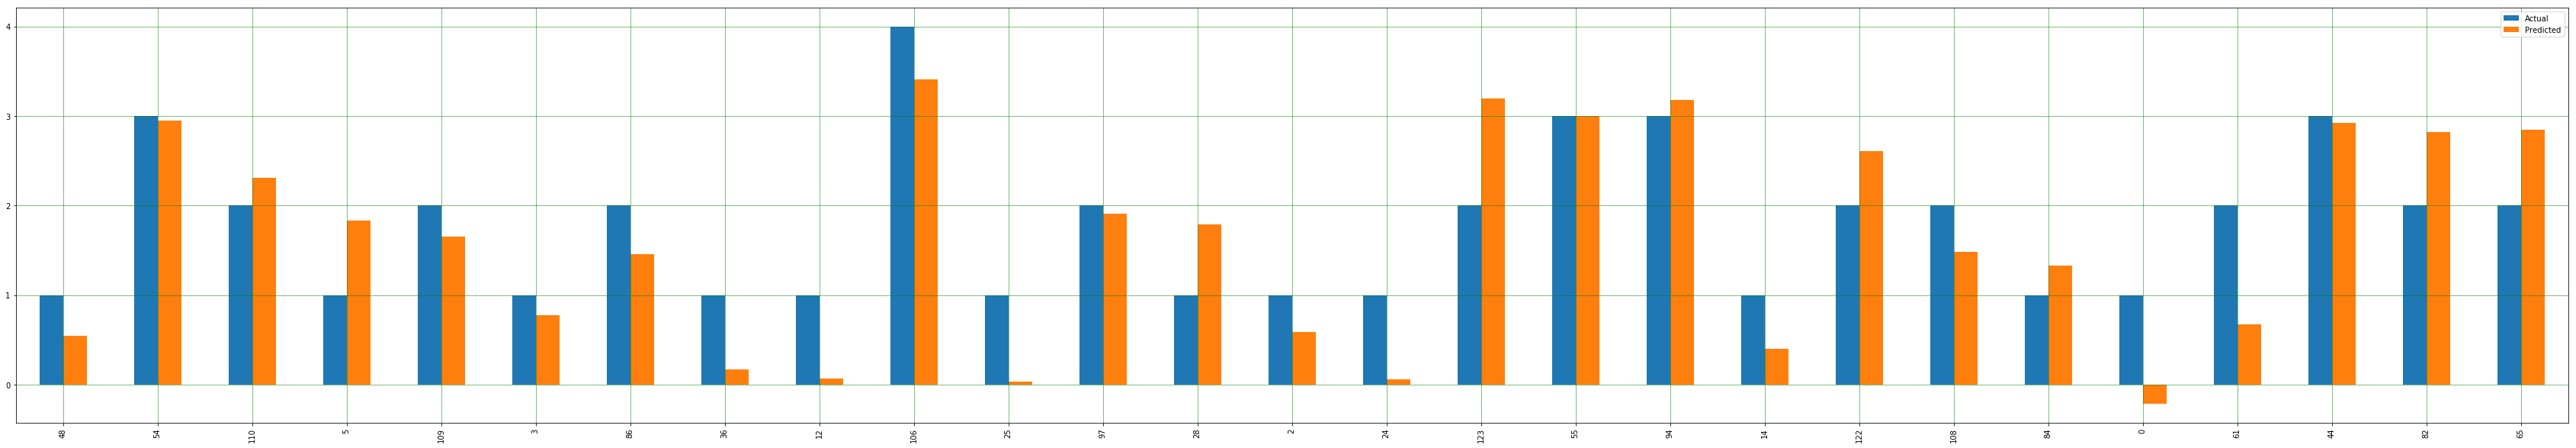

In [0]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:

from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, [0, 5]]
y = df.iloc[:, 7]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)


LoGscores = []
DTscores = []
RFscores = []
SVscores = []


############### DT ###########################################
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
############### DT ###########################################
from sklearn import tree
DTclf=tree.DecisionTreeClassifier()

############### RF ############################################
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=11)

######################### SVM ##################################
from sklearn.svm import SVC
SVclf = SVC(kernel='poly', degree=4)

from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=2, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    ############# for LoG #################
    logreg.fit(X_train, y_train)
    LoGscores.append(logreg.score(X_test, y_test))
    ############# for DT #################
    DTclf.fit(X_train, y_train)
    DTscores.append(DTclf.score(X_test, y_test))
    ############# for RF #################
    RFclf.fit(X_train, y_train)
    RFscores.append(RFclf.score(X_test, y_test))
    ############# For SVM #################
    SVclf.fit(X_train, y_train)
    SVscores.append(SVclf.score(X_test, y_test))
    


import numpy as np
print('Logistic Reg.  scores:', np.mean(LoGscores))
print('Decision Tree scores:', np.mean(DTscores))
print('Random Forest scores:', np.mean(RFscores))
print('SVM scores:', np.mean(SVscores))

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'sca

Train Index:  [  1   4   6   7   8   9  10  11  13  15  16  17  18  19  20  21  22  23
  26  27  29  30  31  32  33  34  35  37  38  39  40  41  42  43  45  46
  47  49  50  51  52  53  56  57  58  59  60  62  63  64  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  83  85  87  88  89  90
  91  92  93  95  96  98  99 100 101 102 103 104 105 107 111 112 113 114
 115 116 117 118 119 120 121 124 125 126 127 128 129 130 131 132 133] 

Test Index:  [  0   2   3   5  12  14  24  25  28  36  44  48  54  55  61  65  82  84
  86  94  97 106 108 109 110 122 123]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  12  14  15  17  18  19  20
  22  24  25  26  28  31  32  33  34  36  37  38  39  40  42  43  44  46
  47  48  49  50  51  52  54  55  56  57  58  60  61  62  63  65  66  67
  68  69  70  72  73  75  76  79  80  82  83  84  85  86  87  88  89  90
  91  93  94  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 118 119 120 122 123 124 1

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ve

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
#read csv file
x = df[['MONTH','YEAR','HUMIDITY', 'MIN', 'RAINFALL', 'MAX']]
y = df['LEVEL']

model = svm.SVC()
accuracy = cross_val_score(model, x, y, scoring='accuracy', cv = 11)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=11.
  % (min_groups, self.n_splits)), Warning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Contin

[0.26666667 0.33333333 0.66666667 0.5        0.5        0.45454545
 0.63636364 0.63636364 0.6        0.4        0.4       ]
Accuracy of Model with Cross Validation is: 49.03581267217631


C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\FAZLY\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
